# ANTARES-DESI SN Datastream

Take the output of Chien-Hsiu's [antares_client](https://gitlab.com/noao/antares/client) query and plot the positions of SNe in the data stream.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import healpy as hp
from astropy.io import ascii

mpl.rc('font', size=14)

## Load CSV Data

The query program, which you can run as follows,

`python query_alerts.py -h`

generates CSV output from the data stream. The easiest way to view it is to load it into an [astropy.Table](https://docs.astropy.org/en/stable/table/).

In [2]:
data = ascii.read('results_antares_2020-02-01.csv')
data

alert_id,dec,htm20,ingest_time,locus_id,mjd,original_id,properties,ra,streams,survey,watched_objects,G0,R0,anomaly_dmdt_score,astrorapid_error,astrorapid_error_log_id,astrorapid_skipped,astrorapid_success,bii,chi2,g_minus_r,g_minus_r_err,gw_last_proc_status,horizons_absolutemag,horizons_dec_posunc_3sig_arcsec,horizons_heliodist_au,horizons_observerdist_au,horizons_predictedmagnitude,horizons_ra_posunc_3sig_arcsec,horizons_slopeparameter,horizons_solarelongation,horizons_solarphaseangle,horizons_targetname,horizons_true_anomaly,kafka_msg_create_time,last_nondetection,lia_prediction,lii,mag,ndet,passband,plausible_gw_events_assoc,provenance_id,rapid_class_probability_AGN,rapid_class_probability_CART,rapid_class_probability_ILOT,rapid_class_probability_Kilonova,rapid_class_probability_PISN,rapid_class_probability_Pre-explosion,rapid_class_probability_SLSN-I,rapid_class_probability_SNII,rapid_class_probability_SNIa-91bg,rapid_class_probability_SNIa-norm,rapid_class_probability_SNIa-x,rapid_class_probability_SNIbc,rapid_class_probability_TDE,rapid_class_probability_point-Ia,snfilter_fid1_rising,snfilter_fid2_rising,snfilter_known_exgal,snfilter_last_proc_status,t0,te,u0,ztf_aimage,ztf_aimagerat,ztf_bimage,ztf_bimagerat,ztf_candid,ztf_chinr,ztf_chipsf,ztf_classtar,ztf_clrcoeff,ztf_clrcounc,ztf_clrmed,ztf_clrrms,ztf_dec,ztf_decnr,ztf_diffmaglim,ztf_distnr,ztf_distpsnr1,ztf_distpsnr2,ztf_distpsnr3,ztf_drb,ztf_drbversion,ztf_dsdiff,ztf_dsnrms,ztf_elong,ztf_exptime,ztf_fid,ztf_field,ztf_fwhm,ztf_isdiffpos,ztf_jd,ztf_jdendhist,ztf_jdendref,ztf_jdstarthist,ztf_jdstartref,ztf_magap,ztf_magapbig,ztf_magdiff,ztf_magfromlim,ztf_maggaia,ztf_maggaiabright,ztf_magnr,ztf_magpsf,ztf_magzpsci,ztf_magzpscirms,ztf_magzpsciunc,ztf_mindtoedge,ztf_nbad,ztf_ncovhist,ztf_ndethist,ztf_neargaia,ztf_neargaiabright,ztf_nframesref,ztf_nid,ztf_nmatches,ztf_nmtchps,ztf_nneg,ztf_object_id,ztf_objectidps1,ztf_objectidps2,ztf_objectidps3,ztf_pdiffimfilename,ztf_pid,ztf_programid,ztf_programpi,ztf_ra,ztf_ranr,ztf_rb,ztf_rbversion,ztf_rcid,ztf_rfid,ztf_scorr,ztf_seeratio,ztf_sgmag1,ztf_sgmag2,ztf_sgmag3,ztf_sgscore1,ztf_sgscore2,ztf_sgscore3,ztf_sharpnr,ztf_sigmagap,ztf_sigmagapbig,ztf_sigmagnr,ztf_sigmapsf,ztf_simag1,ztf_simag2,ztf_simag3,ztf_sky,ztf_srmag1,ztf_srmag2,ztf_srmag3,ztf_ssdistnr,ztf_ssmagnr,ztf_ssnamenr,ztf_ssnrms,ztf_sumrat,ztf_szmag1,ztf_szmag2,ztf_szmag3,ztf_tblid,ztf_tooflag,ztf_xpos,ztf_ypos,ztf_zpclrcov,ztf_zpmed
int64,float64,int64,int64,int64,float64,int64,int64,float64,str141,int64,str2,int64,int64,float64,int64,int64,str10,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64,float64,int64,str1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,str77,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,int64,int64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,str12,int64,int64,int64,str57,int64,int64,str8,float64,float64,float64,str9,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
432762268,4.8447047,14494637034677,1581033161,8457189,58885.548738399986,1131548734715015011,--,238.0505983,"['desi_candidate_test', 'young_extragalactic_candidate', 'refitt_newsources_snrcut']",1,[],--,--,0.08382751038018973,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1580995143.163,58885.46319440007,--,--,19.14385223388672,4,R,--,11059,0

### Access RA, Dec, ZTF Mag

In [3]:
ra = data['ra']
dec = data['dec']
magap = data['ztf_magap']

### Plot SNe

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


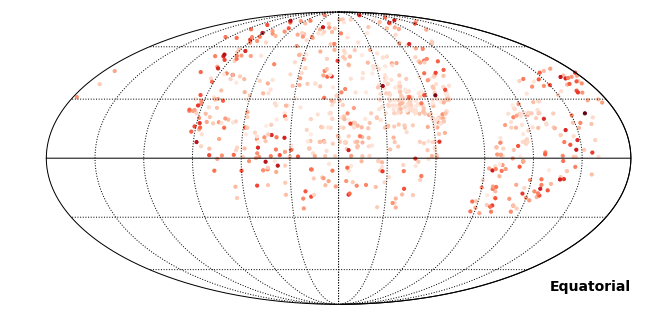

In [4]:
nside = 8
npix = hp.nside2npix(nside)
bkg = np.zeros(npix, dtype=float)

hp.mollview(bkg, coord='C', flip='astro', rot=180, cmap='binary', min=0,max=1,
            title='', cbar=None)
hp.graticule()

# Plot SN locations, color-coded by magnitude (dimmer == lighter color).
hp.projscatter(ra, dec, lonlat=True, s=10, c=magap, cmap='Reds_r')